بر روی دیتاست ماه چیست و با چه روش هایی حل میشود projection مشکل

در  دنیای واقعی، نمونه های آموزشی در ابعاد مشابه نیستند. بعضی دارای ابعاد زیاد هستند و در این ابعاد زیاد بعضی  از ویژگی‌ها تقریباً ثابت هستند، در حالی که برخی دیگر بسیار همبسته هستند در نتیجه، تمام نمونه‌های آموزشی در یک زیرفضای بسیار پایین‌تر از فضای با ابعاد بالا (یا نزدیک به ابعاد بالا) قرار دارند.بنابرای از روشهایی برای کاهش ابعاد استفاده میشود 
این روشها متفاوتند بسته به نوع داده ها

مانند 
FactorAnalysis , pca, fastICA ,TSNE

داده هایی که کورولیشن بالای خطی دارند روی داده های گل زنبق را با الگوریتم زیر حذف کنید

FactorAnalysis (mean)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from umap import UMAP

2023-02-25 19:30:49.479238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-25 19:30:49.500049: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 19:31:09.084601: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-25 19:31:09.085232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-25 19:31:09.085294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]
y = data.target

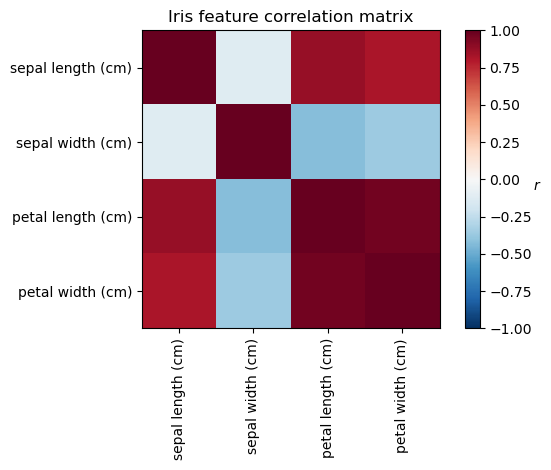

In [4]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()



 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


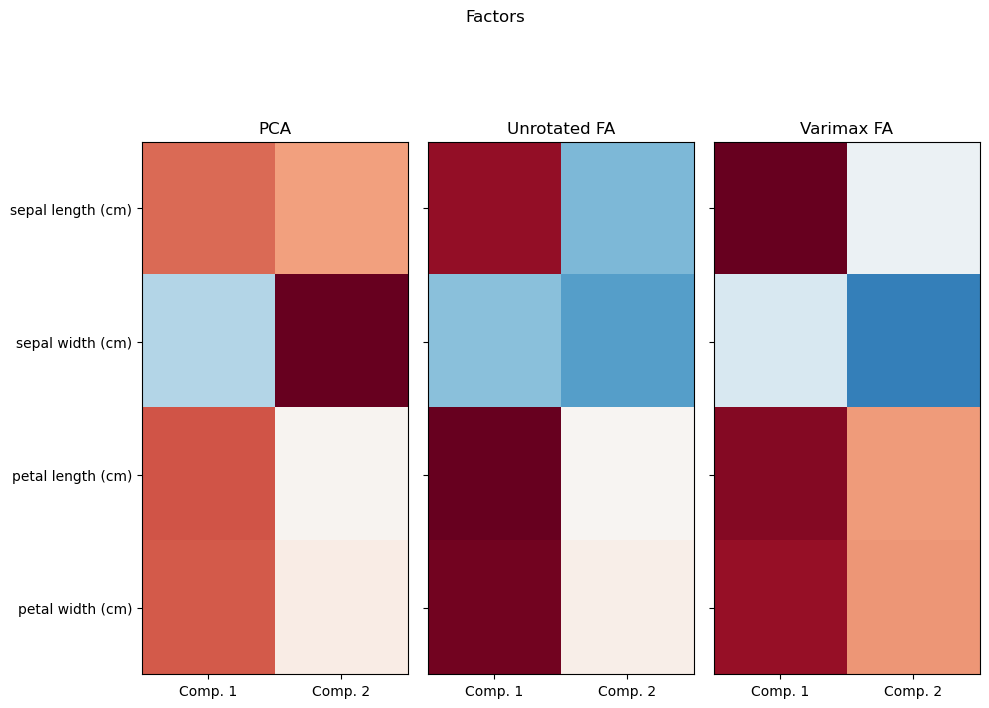

In [5]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

ابعاد را به 1 کاهش دهید lda حال با استفاده از

In [7]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]
y = data.target

In [8]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)
X_lda[:10]

array([[8.06179978],
       [7.12868772],
       [7.48982797],
       [6.81320057],
       [8.13230933],
       [7.70194674],
       [7.21261762],
       [7.60529355],
       [6.56055159],
       [7.34305989]])

ICA

برای داده های که ویژگی های آنها کورولیشن غیر خطی دارند استفاده میشود

isomap

فاصله ها را استفاده کرده و از منیفولد استفاده میکند

روی دیتای ماه آن را تست کنید و تغییرات را با پلات کردن نشان دهید

In [9]:
from sklearn.datasets import make_moons ,make_circles
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt

In [10]:
datasets = {'moons': make_moons(n_samples=500, noise=0.075, random_state=1364)}
X_moons, y_moons = datasets['moons']

In [11]:
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)

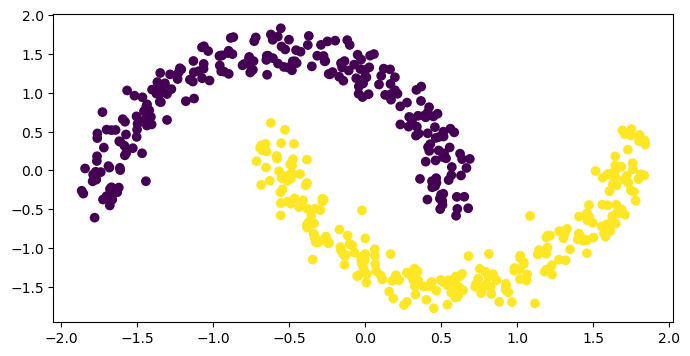

In [12]:
figure = plt.figure(figsize=(8, 4))
plt.scatter(X_moons[:,0], X_moons[:, 1], c=y_moons)

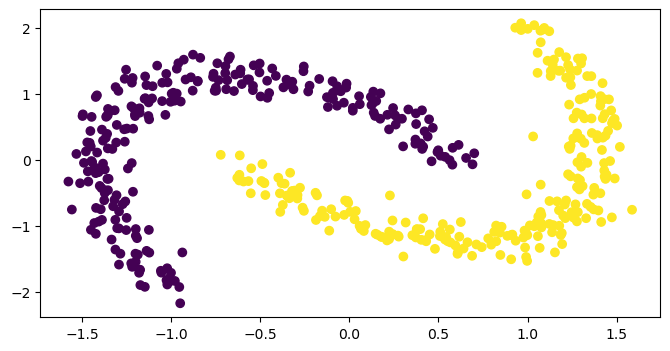

In [16]:
ica= FastICA(n_components=2,random_state=0, whiten='unit-variance')
x_ica = ica.fit_transform(X_moons)
figure = plt.figure(figsize=(8, 4))
plt.scatter(x_ica[:,0], x_ica[:, 1],c=y_moons)

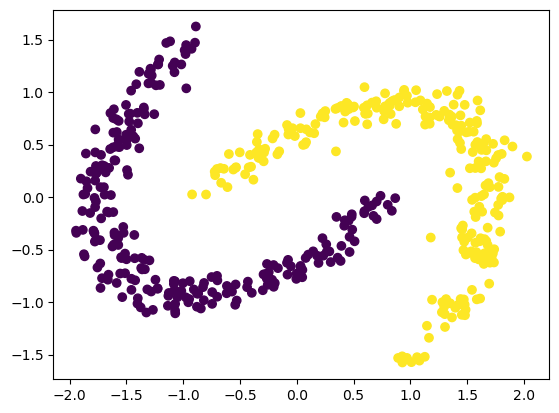

In [17]:
iso = Isomap(n_neighbors=60,n_components=2)
iso.fit(X_moons)
x_isomap = iso.transform(X_moons)
plt.scatter(x_isomap[:,0],x_isomap[:,1],c=y_moons)

tsne

با استفاده از گراف و همسایگی این کار را انجام میدهد و هم نقاط دور را در از هم 

در نظر میگیرد لوکال و گلوبال را در نظر می گیرد

با استفاده از 

umap 

که سرعت پایین الگوریتم قبل را بهبود بخشیده  دیتای ماه را کاهش ابعاد دهید و در انتها با رسم پلات عملکرد ها را مقایسه کنید

(با هر دو الگوریتم این کار را انجام دهید)


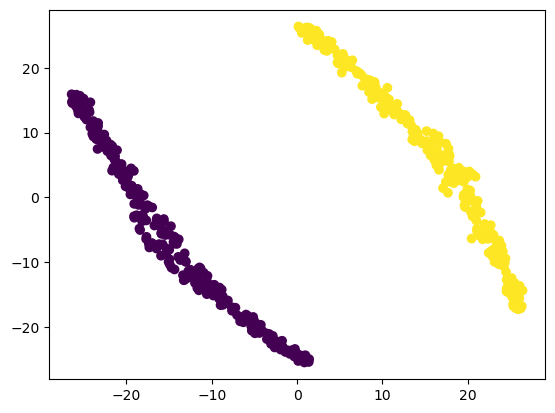

In [18]:
tnse = TSNE(random_state = 42, n_components=2)
x_tnse = tnse.fit_transform(X_moons)
plt.scatter(x_tnse[:,0],x_tnse[:,1],c=y_moons)

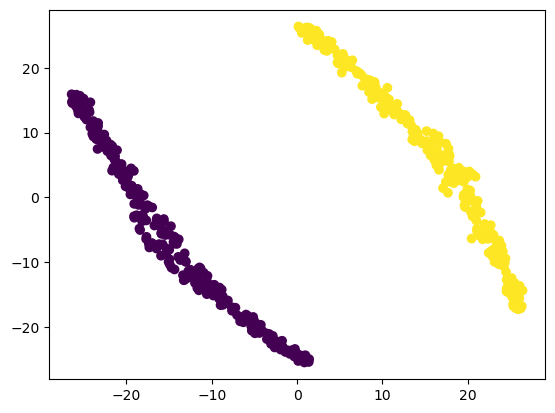

In [19]:
ump =UMAP()
x_ump = tnse.fit_transform(X_moons)
plt.scatter(x_ump[:,0],x_ump[:,1],c=y_moons)

یک شبکه عصبی به صورت سریالی با کتابخانه کراس بسازید و آن را در فایلی سیو کنید

In [20]:
import keras
from keras.datasets import boston_housing
  
(train_data, train_targets), (test_data, test_targets)= boston_housing.load_data()
  
mean = train_data.mean(axis = 0)
train_data-= mean
std = train_data.std(axis = 0)
  
train_data/= std
test_data-= mean
test_data/= std



from keras import models
from keras import layers
  
model = models.Sequential()
model.add(layers.Dense(64, activation ="relu", input_shape =(train_data.shape[1], )))
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(1))
model.compile(optimizer ="rmsprop", loss ="mse", metrics =["mae"])
loss, accuracy = model.evaluate(test_data, test_targets)

2023-02-25 19:33:58.535061: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-25 19:33:58.535123: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-25 19:33:58.535180: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cmos-HP-ProBook-4540s): /proc/driver/nvidia/version does not exist


4/4 [==============================] - 1s 7ms/step - loss: 602.5717 - mae: 22.7419


In [62]:

from keras.models import load_model
model.save("network.h5")
loaded_model = load_model("network.h5")
loss, accuracy = loaded_model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 626.2048 - mae: 23.3535


In [ ]:
# Saving model structure to a JSON file
  
model_json = model.to_json() # with open("network.json", "w") as json_file:
    json_file.write(model_json)
  
# Saving weights of the model to a HDF5 file
model.save_weights("network.h5")
  
# Loading JSON file 
json_file = open("network.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
  
# Loading weights
loaded_model.load_weights("network.h5")
loss, accuracy = loaded_model.evaluate(test_data, test_targets)

In [ ]:
# Saving model structure to a YAML file
model_yaml = model.to_yaml() 
with open("network.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
  
# Saving weights of the model to a HDF5 file
model.save_weights("network.h5")
  
# Loading YAML file 
yaml_file = open("network.yaml", 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
  
# Loading weights
loaded_model.load_weights("network.h5")
loss, accuracy = loaded_model.evaluate(test_data, test_targets)

linux

1- در لینوکس برای مخفی سازی از چی استفاده میشود و برای دید فایل های مخفی چه کلیدی در دستور

ls

استفاده میشود

Right-click the file you want to hide.
Then, select Rename.
Make the file hidden by placing a period at the beginning of the filename.


2- آپشن های دستور زیر تحلیل کنید
ls -lahtr

In Linux, the command "ls" is one of the most commonly used. It's used to display a list of files and sub-directories in the current directory. If you're new to using the command line, the first command you should learn is probably ls. This command can be used by both regular users as well as system administrators.

ls option	Description
ls -a	In Linux, hidden files start with . (dot) symbol and they are not visible in the regular directory. The (ls -a) command will enlist the whole list of the current directory including the hidden files.
ls -l	It will show the list in a long list format.
ls -lh	This command will show you the file sizes in human readable format. Size of the file is very difficult to read when displayed in terms of byte. The (ls -lh)command will give you the data in terms of Mb, Gb, Tb, etc.
ls -lhS	If you want to display your files in descending order (highest at the top) according to their size, then you can use (ls -lhS) command.
ls -l - -block-size=[SIZE]	It is used to display the files in a specific size format. Here, in [SIZE] you can assign size according to your requirement.
ls -d */	It is used to display only subdirectories.
ls -g or ls -lG	With this you can exclude column of group information and owner.
ls -n	It is used to print group ID and owner ID instead of their names.
ls --color=[VALUE]	This command is used to print list as colored or discolored.
ls -li	This command prints the index number if file is in the first column.
ls -p	It is used to identify the directory easily by marking the directories with a slash (/) line sign.
ls -r	It is used to print the list in reverse order.
ls -R	It will display the content of the sub-directories also.
ls -lX	It will group the files with same extensions together in the list.
ls -lt	It will sort the list by displaying recently modified filed at top.
ls ~	It gives the contents of home directory.
ls ../	It give the contents of parent directory.
ls --version	It checks the version of ls command.


-R رو هم توضیح دهید

ls -R	It will display the content of the sub-directories also.

3- در تصویر زیر منظور از فلش ها چیست

It means the file in question is a symbolic link and the path after the -> is the target of the symbolic link.

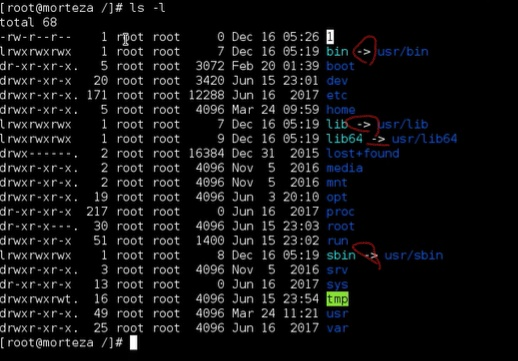
